In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
df = pd.read_csv('Iris.csv')

In [56]:
X = df.drop(columns=['Id','Species'])
y = df['Species']

In [57]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [16]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(112, 4) (112,) (38, 4) (38,)


In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

In [19]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

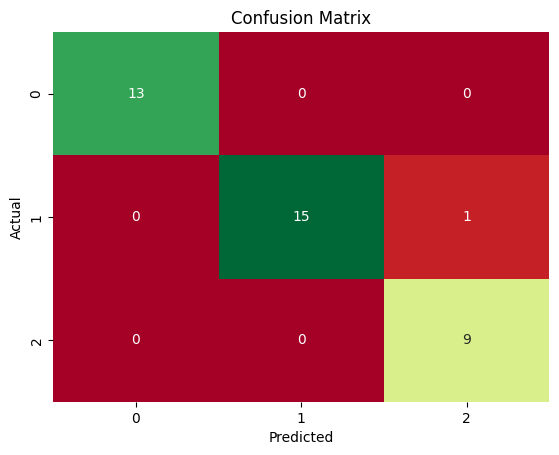

In [23]:
pred = clf.predict(X_test)
cm = confusion_matrix(y_test, pred)
labels = np.unique(y_train)
sns.heatmap(cm,annot=True,fmt='d',cmap='RdYlGn',cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Using Standard Scaler

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
clf2 = KNeighborsClassifier(n_neighbors=3)
clf2.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

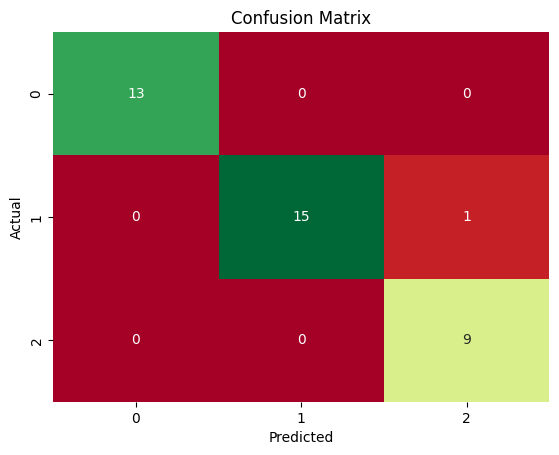

In [26]:
pred = clf2.predict(X_test)
cm = confusion_matrix(y_test, pred)
labels = np.unique(y_train)
sns.heatmap(cm,annot=True,fmt='d',cmap='RdYlGn',cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### MinMaxScaler

In [58]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

scaler = MinMaxScaler()


scaler.fit(X_train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])
X_train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] = scaler.transform(X_train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])

In [59]:
scaler.fit(X_test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])
X_test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] = scaler.transform(X_test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])

In [46]:
clf3 = KNeighborsClassifier(n_neighbors=3)
clf3.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

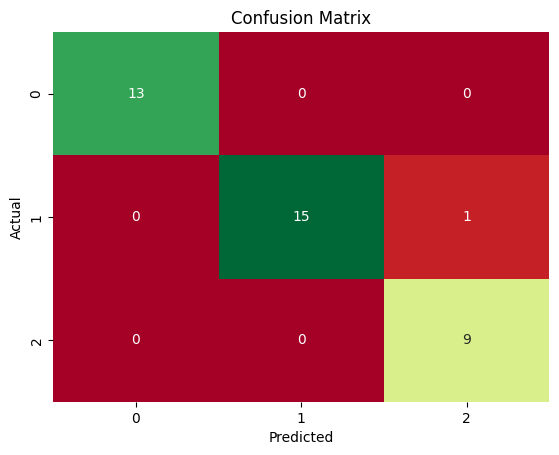

In [47]:
pred = clf3.predict(X_test)
cm = confusion_matrix(y_test, pred)
labels = np.unique(y_train)
sns.heatmap(cm,annot=True,fmt='d',cmap='RdYlGn',cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Hyperparameter tunning

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [49]:
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

# Define the grid of hyperparameters to search
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

# Perform GridSearchCV
grid_search = GridSearchCV(knn, grid_params, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'}


In [60]:
clf4 = KNeighborsClassifier(metric='manhattan',n_neighbors=15,weights='uniform')
clf4.fit(X_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=15)

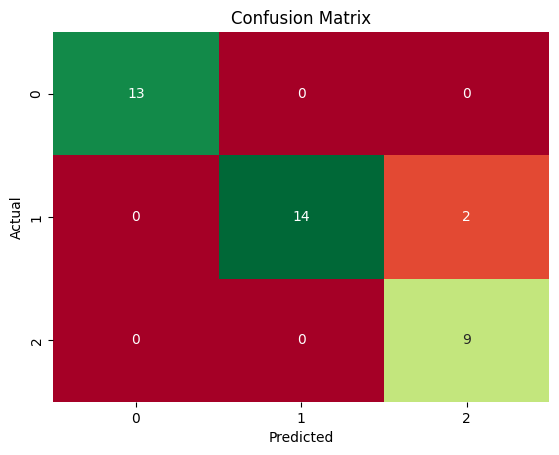

In [61]:
pred = clf4.predict(X_test)
cm = confusion_matrix(y_test, pred)
labels = np.unique(y_train)
sns.heatmap(cm,annot=True,fmt='d',cmap='RdYlGn',cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()